In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

In [12]:
(X_train, y_train),(  X_test, y_test)=keras.datasets.mnist.load_data()

In [15]:
def plotsample(x,y,index):
  plt.figure(figsize=(15,3))
  plt.imshow(x[index])
  plt.xlabel(y[index])

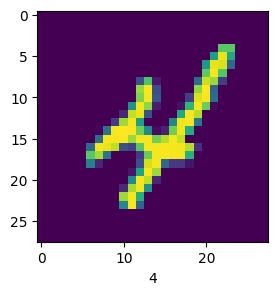

In [16]:
plotsample(X_train, y_train, 9)



In [17]:
model= keras.Sequential([
     keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=2)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7959 - loss: 7.8933
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8924 - loss: 0.4475


In [20]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9050 - loss: 0.3920


[0.3321528732776642, 0.9151999950408936]

In [28]:
#for CNN:\
X_train= X_train.reshape(-1,28,28,1)
X_train.shape

 #X_test= X_test.reshape(-1,28,28,3)

(60000, 28, 28, 1)

In [29]:
X_test.shape
X_test= X_test.reshape(-1,28,28,1)

In [32]:
modelCNN= keras.Sequential([
    layers.Conv2D(25, (4,4), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((3,3)),

    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='sigmoid')


])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
modelCNN.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']

)
modelCNN.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.9824 - loss: 0.0611
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9879 - loss: 0.0408
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.9883 - loss: 0.0394
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9916 - loss: 0.0281
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.9926 - loss: 0.0287


In [36]:
modelCNN.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9775 - loss: 0.0990


[0.08203389495611191, 0.9804999828338623]